In [ ]:
import pandas as pd


file_path = "/content/Tetuan City power consumption.csv"
df = pd.read_csv(file_path)


print("Raw DataFrame Head:")
print(df.head())

# Standardize column names: strip spaces, replace double spaces with single space, then replace spaces with underscores
df.columns = [col.strip().replace("  ", " ").replace(" ", "_") for col in df.columns]
print("\nStandardized Column Names:")
print(df.columns.tolist())

# Convert DateTime column to datetime type, inferring the format
df['DateTime'] = pd.to_datetime(df['DateTime'], infer_datetime_format=True, errors='coerce')

# Display DataFrame info after conversion
print("\nDataFrame Info After DateTime Conversion:")
print(df.info())


print("\nMissing Values:")
print(df.isnull().sum())


print("\nProcessed DataFrame Head:")
print(df.head())


Raw DataFrame Head:
        DateTime  Temperature  Humidity  Wind Speed  general diffuse flows  \
0  1/1/2017 0:00        6.559      73.8       0.083                  0.051   
1  1/1/2017 0:10        6.414      74.5       0.083                  0.070   
2  1/1/2017 0:20        6.313      74.5       0.080                  0.062   
3  1/1/2017 0:30        6.121      75.0       0.083                  0.091   
4  1/1/2017 0:40        5.921      75.7       0.081                  0.048   

   diffuse flows  Zone 1 Power Consumption  Zone 2  Power Consumption  \
0          0.119               34055.69620                16128.87538   
1          0.085               29814.68354                19375.07599   
2          0.100               29128.10127                19006.68693   
3          0.096               28228.86076                18361.09422   
4          0.085               27335.69620                17872.34043   

   Zone 3  Power Consumption  
0                20240.96386  
1         

<ipython-input-3-d82a7b2ac106>:17: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['DateTime'] = pd.to_datetime(df['DateTime'], infer_datetime_format=True, errors='coerce')


## Plots

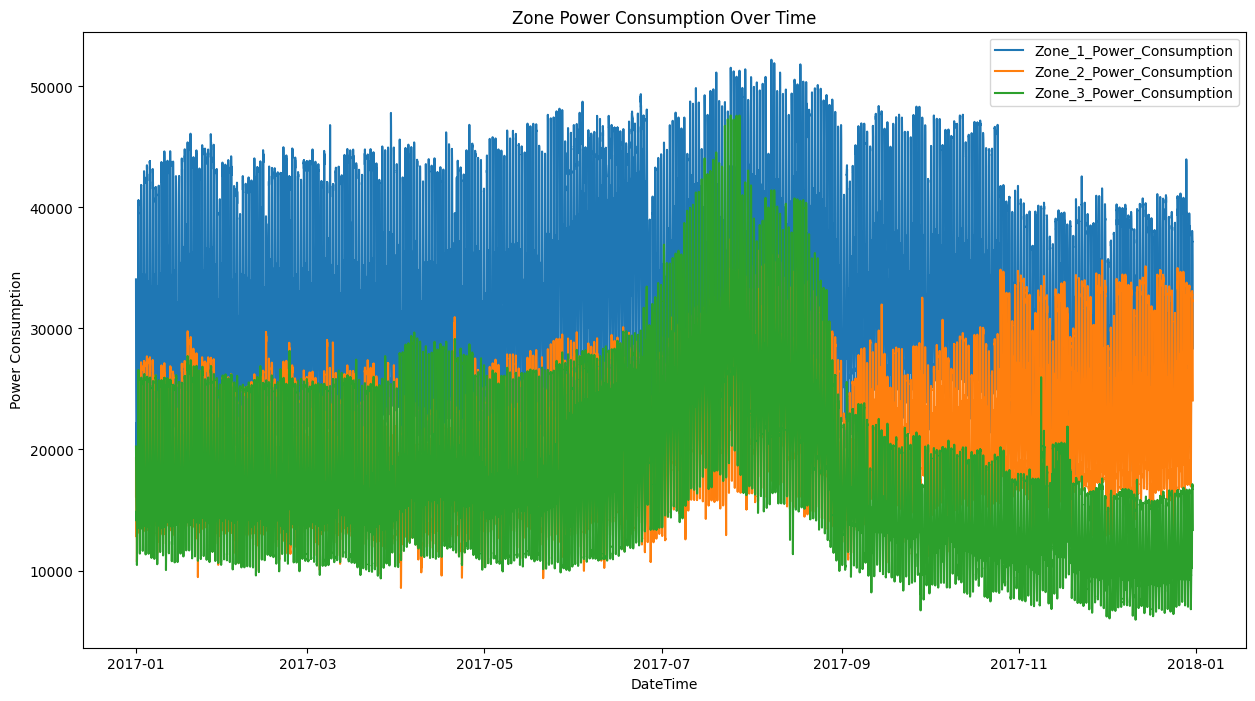

Summary Statistics for Power Consumption:
       Zone_1_Power_Consumption  Zone_2_Power_Consumption  \
count              52416.000000              52416.000000   
mean               32344.970564              21042.509082   
std                 7130.562564               5201.465892   
min                13895.696200               8560.081466   
25%                26310.668692              16980.766032   
50%                32265.920340              20823.168405   
75%                37309.018185              24713.717520   
max                52204.395120              37408.860760   

       Zone_3_Power_Consumption  
count              52416.000000  
mean               17835.406218  
std                 6622.165099  
min                 5935.174070  
25%                13129.326630  
50%                16415.117470  
75%                21624.100420  
max                47598.326360  


In [ ]:
import matplotlib.pyplot as plt

# Set 'DateTime' as the index and sort the DataFrame
df.set_index('DateTime', inplace=True)
df.sort_index(inplace=True)

# Define the power consumption columns (zones)
zones = ['Zone_1_Power_Consumption', 'Zone_2_Power_Consumption', 'Zone_3_Power_Consumption']

# Plot the time series for each zone
plt.figure(figsize=(15, 8))
for zone in zones:
    plt.plot(df.index, df[zone], label=zone)
plt.xlabel('DateTime')
plt.ylabel('Power Consumption')
plt.title('Zone Power Consumption Over Time')
plt.legend()
plt.show()

# Display summary statistics for the zone power consumption columns
print("Summary Statistics for Power Consumption:")
print(df[zones].describe())


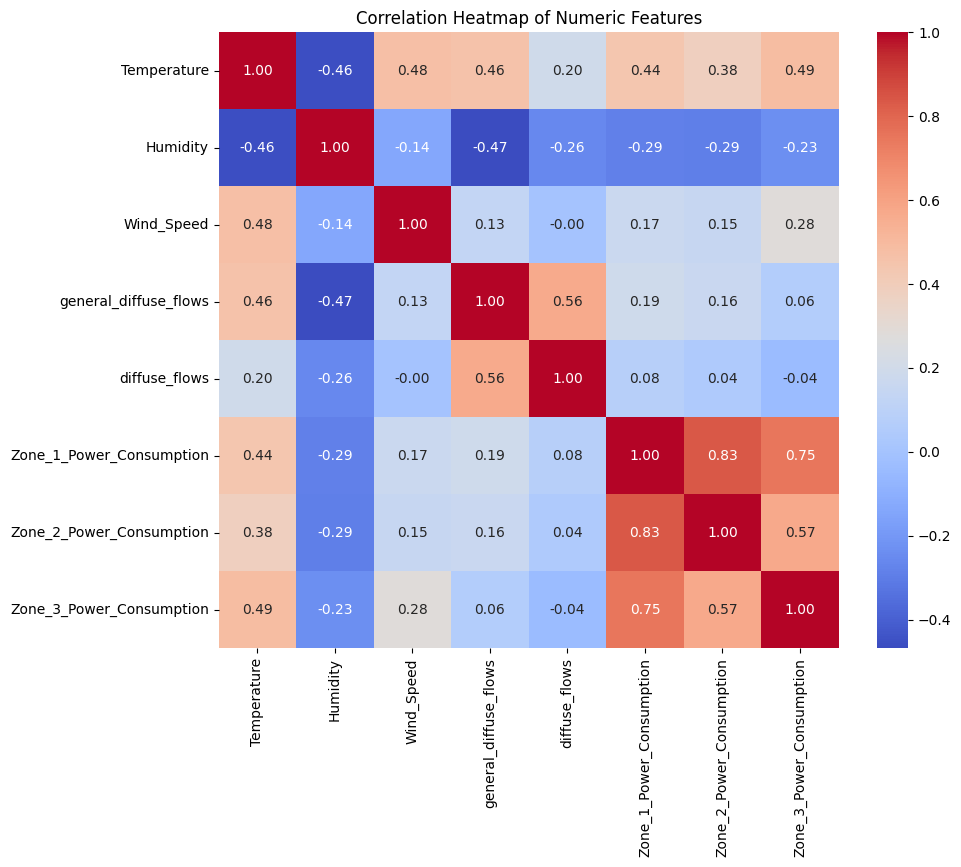

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns for correlation
numeric_cols = [
    'Temperature',
    'Humidity',
    'Wind_Speed',
    'general_diffuse_flows',
    'diffuse_flows',
    'Zone_1_Power_Consumption',
    'Zone_2_Power_Consumption',
    'Zone_3_Power_Consumption'
]

# Calculate correlation matrix
corr_matrix = df[numeric_cols].corr()

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Numeric Features")
plt.show()


<Figure size 1200x600 with 0 Axes>

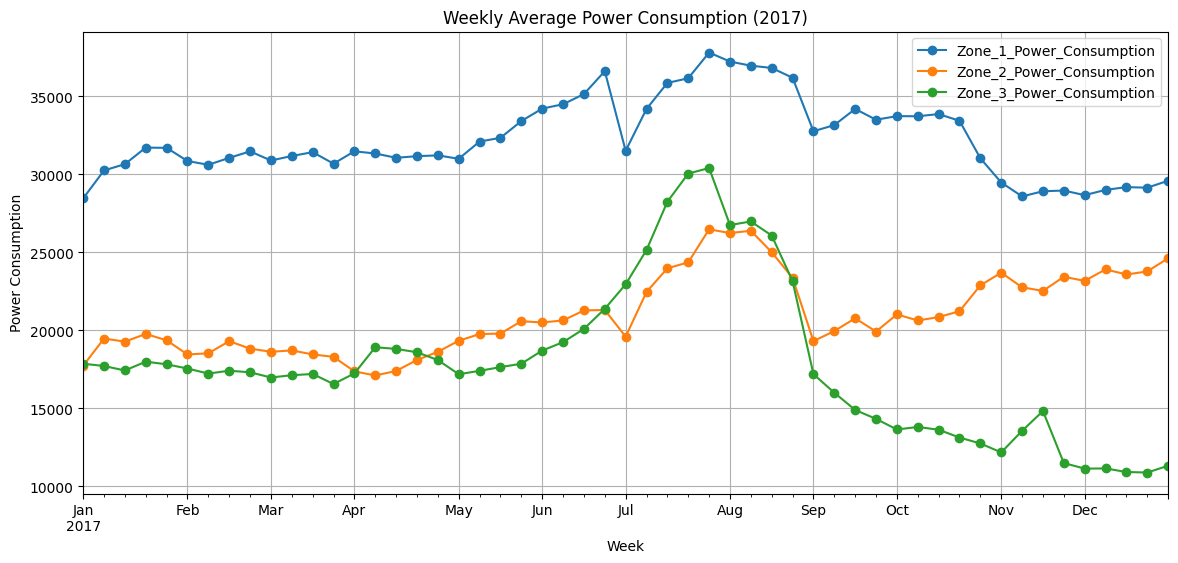

In [ ]:
# Weekly trend: Smoothed weekly average consumption
plt.figure(figsize=(12, 6))
df_weekly = df[['Zone_1_Power_Consumption', 'Zone_2_Power_Consumption', 'Zone_3_Power_Consumption']].resample('W').mean()
df_weekly.plot(figsize=(14, 6), marker='o')
plt.title("Weekly Average Power Consumption (2017)")
plt.ylabel("Power Consumption")
plt.xlabel("Week")
plt.grid(True)
plt.show()


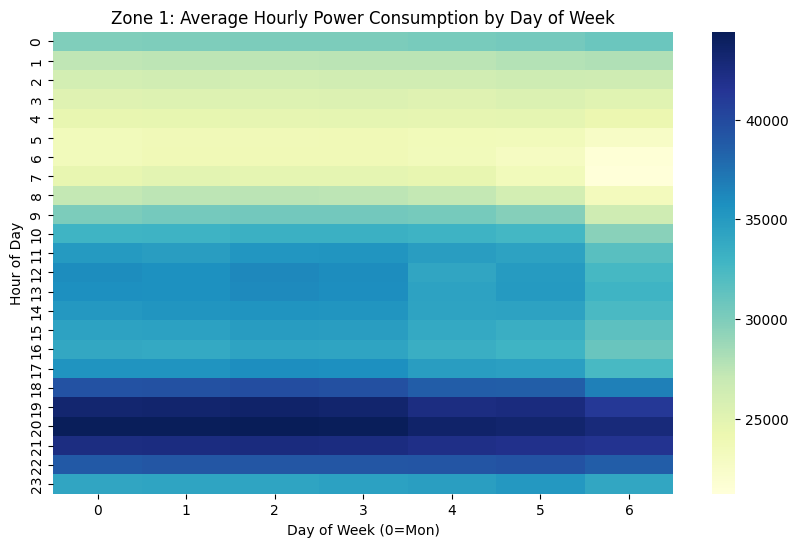

In [ ]:
# Heatmap: Average hourly usage per weekday for Zone 1
pivot = df.pivot_table(index=df.index.hour, columns=df.index.dayofweek,
                       values='Zone_1_Power_Consumption', aggfunc='mean')

plt.figure(figsize=(10, 6))
sns.heatmap(pivot, cmap="YlGnBu", annot=False)
plt.title("Zone 1: Average Hourly Power Consumption by Day of Week")
plt.xlabel("Day of Week (0=Mon)")
plt.ylabel("Hour of Day")
plt.show()


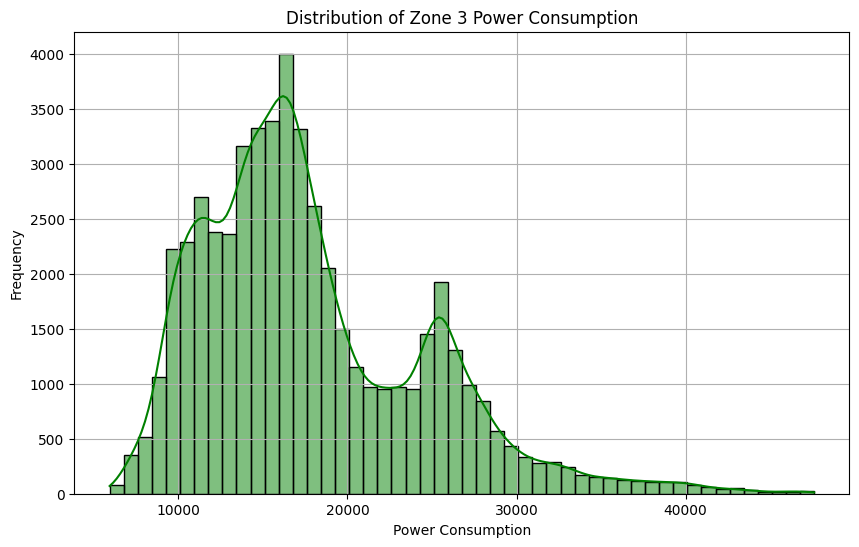

In [ ]:
# Distribution plot for Zone 3
plt.figure(figsize=(10, 6))
sns.histplot(df['Zone_3_Power_Consumption'], bins=50, kde=True, color='green')
plt.title("Distribution of Zone 3 Power Consumption")
plt.xlabel("Power Consumption")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


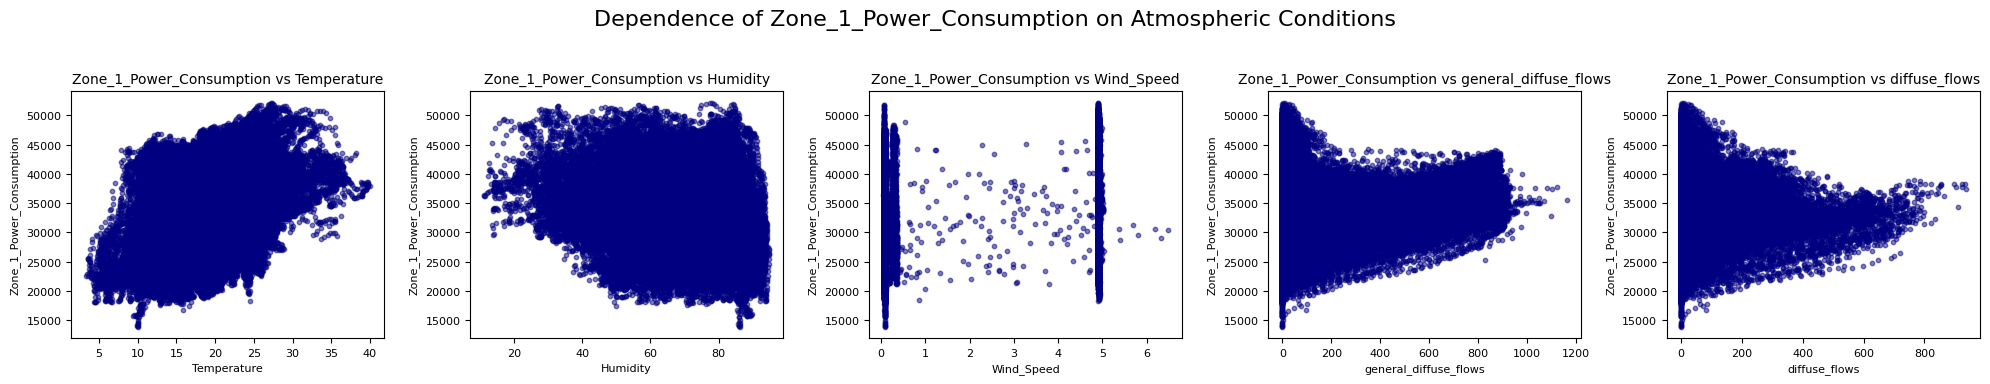

In [ ]:
import matplotlib.pyplot as plt

zone = 'Zone_1_Power_Consumption'
atmo_conditions = ['Temperature', 'Humidity', 'Wind_Speed', 'general_diffuse_flows', 'diffuse_flows']

fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(20, 4))
fig.suptitle(f'Dependence of {zone} on Atmospheric Conditions', fontsize=16)

for j, condition in enumerate(atmo_conditions):
    ax = axes[j]
    ax.scatter(df[condition], df[zone], alpha=0.5, s=10, color='navy')
    ax.set_title(f'{zone} vs {condition}', fontsize=10)
    ax.set_xlabel(condition, fontsize=8)
    ax.set_ylabel(zone, fontsize=8)
    ax.tick_params(axis='both', labelsize=8)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


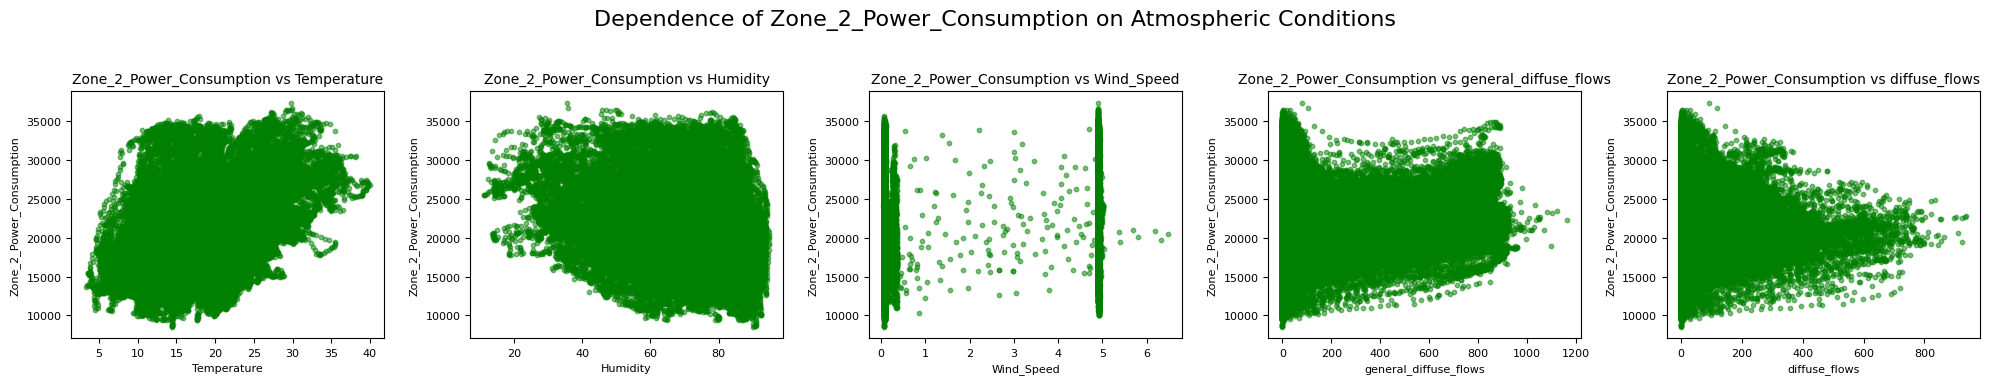

In [ ]:
zone = 'Zone_2_Power_Consumption'
atmo_conditions = ['Temperature', 'Humidity', 'Wind_Speed', 'general_diffuse_flows', 'diffuse_flows']

fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(20, 4))
fig.suptitle(f'Dependence of {zone} on Atmospheric Conditions', fontsize=16)

for j, condition in enumerate(atmo_conditions):
    ax = axes[j]
    ax.scatter(df[condition], df[zone], alpha=0.5, s=10, color='green')
    ax.set_title(f'{zone} vs {condition}', fontsize=10)
    ax.set_xlabel(condition, fontsize=8)
    ax.set_ylabel(zone, fontsize=8)
    ax.tick_params(axis='both', labelsize=8)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


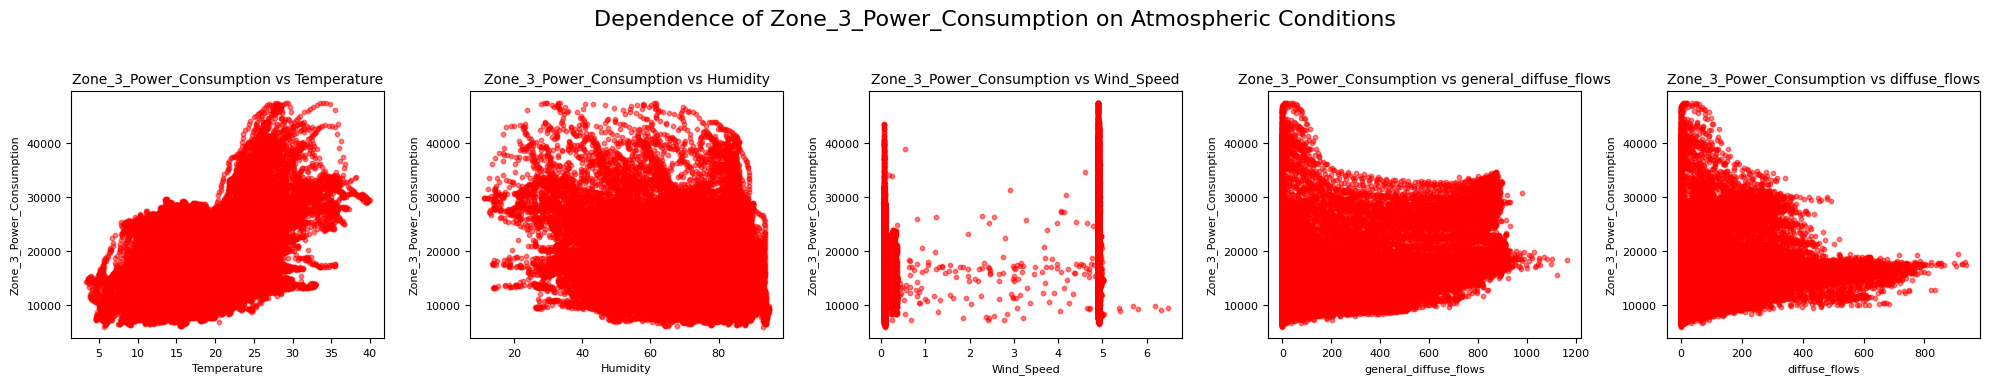

In [ ]:
zone = 'Zone_3_Power_Consumption'
atmo_conditions = ['Temperature', 'Humidity', 'Wind_Speed', 'general_diffuse_flows', 'diffuse_flows']

fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(20, 4))
fig.suptitle(f'Dependence of {zone} on Atmospheric Conditions', fontsize=16)

for j, condition in enumerate(atmo_conditions):
    ax = axes[j]
    ax.scatter(df[condition], df[zone], alpha=0.5, s=10, color='red')
    ax.set_title(f'{zone} vs {condition}', fontsize=10)
    ax.set_xlabel(condition, fontsize=8)
    ax.set_ylabel(zone, fontsize=8)
    ax.tick_params(axis='both', labelsize=8)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


# New Section

<Figure size 1200x600 with 0 Axes>

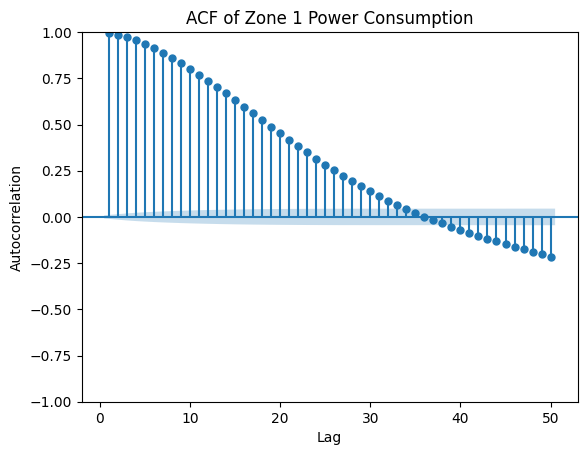

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plot_acf(df['Zone_1_Power_Consumption'], lags=50, zero=False)
plt.title('ACF of Zone 1 Power Consumption')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.show()


<Figure size 1200x600 with 0 Axes>

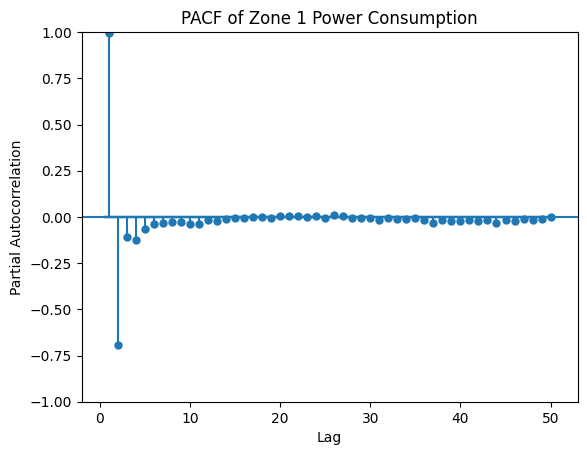

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plot_pacf(df['Zone_1_Power_Consumption'], lags=50, zero=False)
plt.title('PACF of Zone 1 Power Consumption')
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.show()


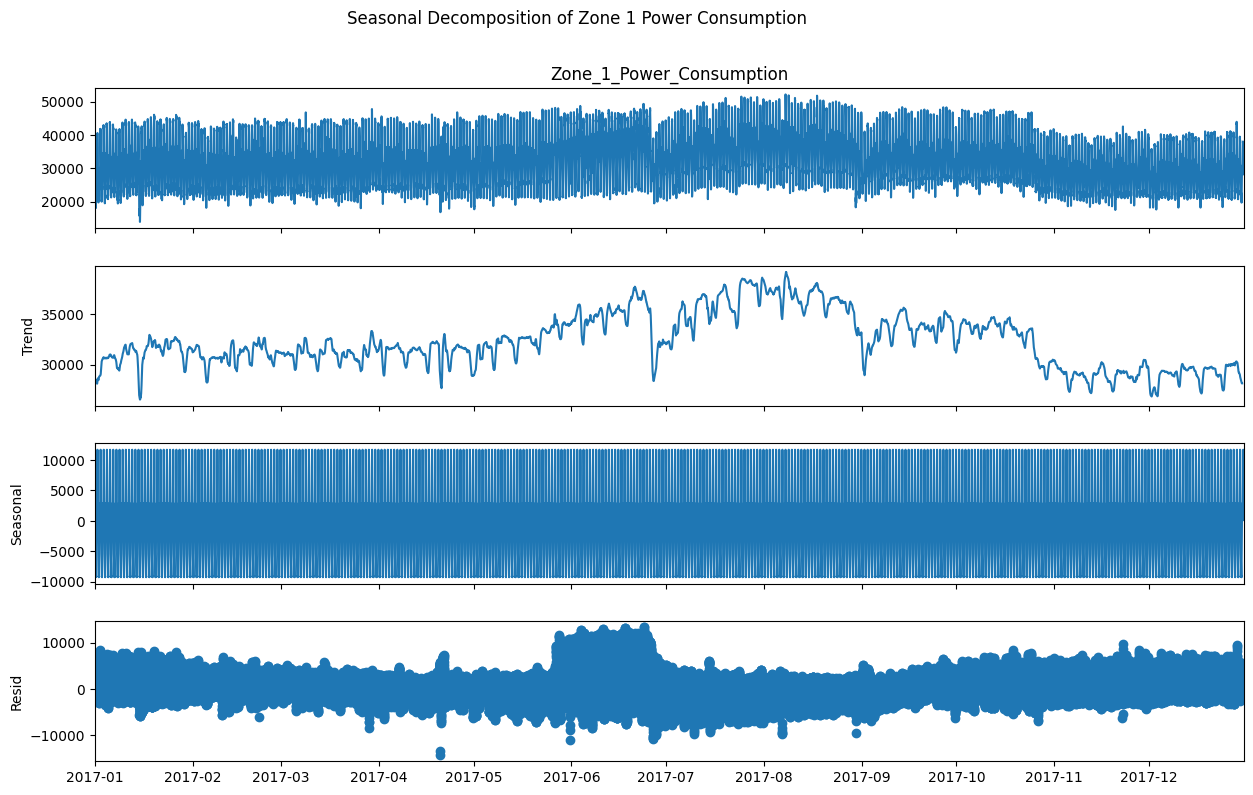

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# Seasonal decomposition with period=144 (one day)
decomposition = seasonal_decompose(df['Zone_1_Power_Consumption'], model='additive', period=144)
fig = decomposition.plot()
fig.set_size_inches(14, 8)
plt.suptitle("Seasonal Decomposition of Zone 1 Power Consumption", y=1.02)
plt.show()


# ACF PACF Seasonal Differencing

In [ ]:
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt

# Perform the Augmented Dickey-Fuller test on the original Zone_1_Power_Consumption series
adf_result = adfuller(df['Zone_1_Power_Consumption'])

print("ADF Test on Original Zone 1 Series")
print("-------------------------------")
print(f"ADF Statistic: {adf_result[0]:.4f}")
print(f"p-value: {adf_result[1]:.4f}")
print("Critical Values:")
for key, value in adf_result[4].items():
    print(f"   {key}: {value:.4f}")


ADF Test on Original Zone 1 Series
-------------------------------
ADF Statistic: -32.1213
p-value: 0.0000
Critical Values:
   1%: -3.4305
   5%: -2.8616
   10%: -2.5668


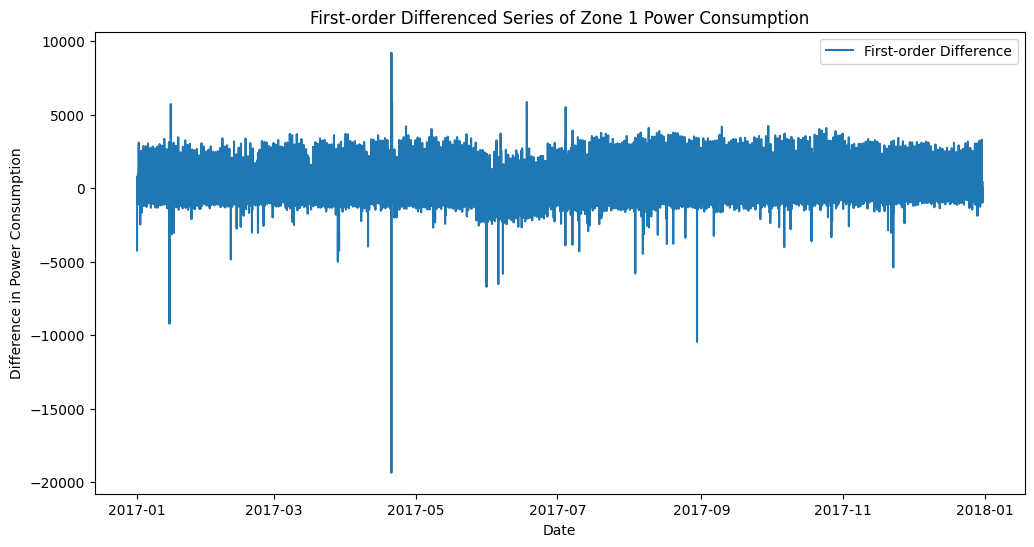

ADF Test on First-order Differenced Series
-----------------------------------------
ADF Statistic: -40.1010
p-value: 0.0000
Critical Values:
   1%: -3.4305
   5%: -2.8616
   10%: -2.5668


In [ ]:
# Compute first-order difference of Zone_1_Power_Consumption
zone1_diff = df['Zone_1_Power_Consumption'].diff().dropna()

# Plot the first-order differenced series
plt.figure(figsize=(12, 6))
plt.plot(zone1_diff, label='First-order Difference')
plt.title('First-order Differenced Series of Zone 1 Power Consumption')
plt.xlabel('Date')
plt.ylabel('Difference in Power Consumption')
plt.legend()
plt.show()

# Perform the ADF test on the differenced series
adf_diff = adfuller(zone1_diff)
print("ADF Test on First-order Differenced Series")
print("-----------------------------------------")
print(f"ADF Statistic: {adf_diff[0]:.4f}")
print(f"p-value: {adf_diff[1]:.4f}")
print("Critical Values:")
for key, value in adf_diff[4].items():
    print(f"   {key}: {value:.4f}")


<Figure size 1200x600 with 0 Axes>

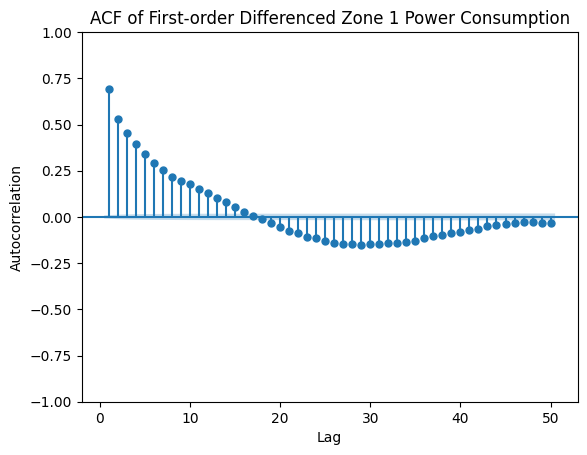

<Figure size 1200x600 with 0 Axes>

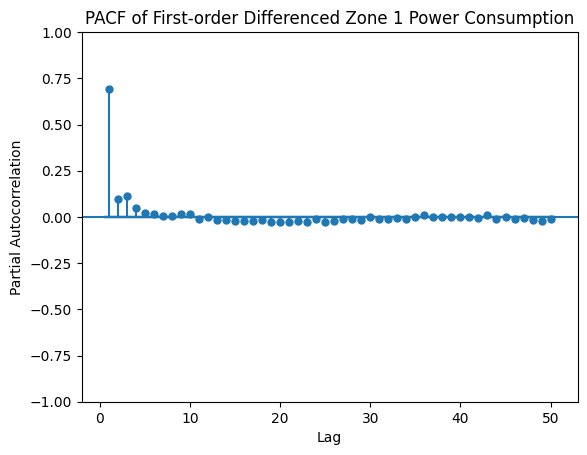

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# Plot ACF for the first-order differenced series
plt.figure(figsize=(12,6))
plot_acf(zone1_diff, lags=50, zero=False)
plt.title("ACF of First-order Differenced Zone 1 Power Consumption")
plt.xlabel("Lag")
plt.ylabel("Autocorrelation")
plt.show()

# Plot PACF for the first-order differenced series
plt.figure(figsize=(12,6))
plot_pacf(zone1_diff, lags=50, zero=False)
plt.title("PACF of First-order Differenced Zone 1 Power Consumption")
plt.xlabel("Lag")
plt.ylabel("Partial Autocorrelation")
plt.show()


# **ARIMA**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 10min will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 10min will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 10min will be used.
  self._init_dates(dates, freq)


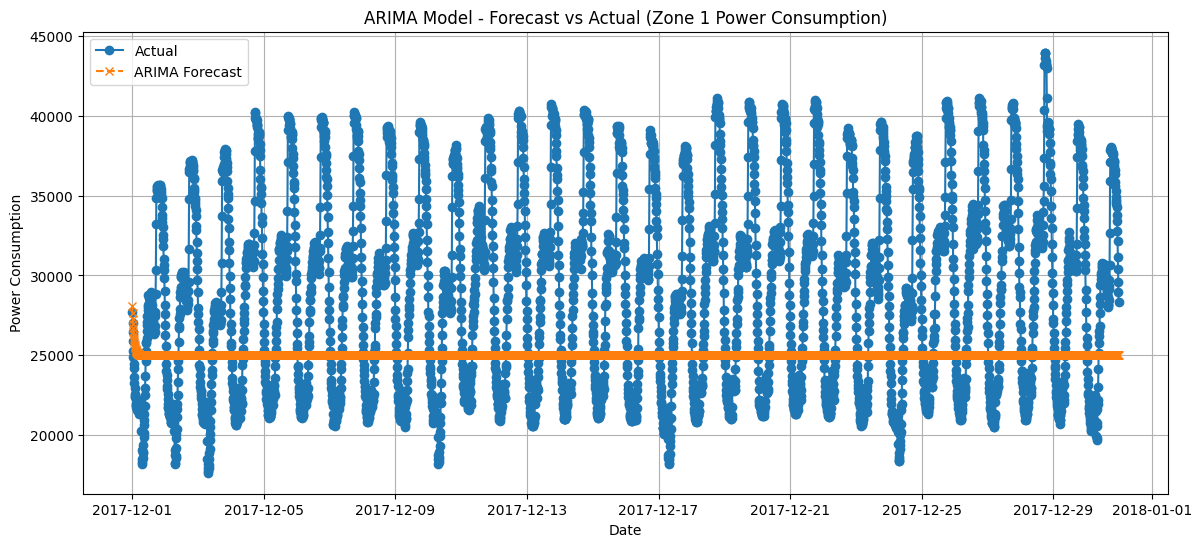

📊 ARIMA Model Evaluation Metrics:
MAE (Mean Absolute Error): 6029.54
RMSE (Root Mean Squared Error): 7366.27
R² Score: -0.4227


In [ ]:
# ---------------------------
# Import evaluation metrics
# ---------------------------
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# ---------------------------
# Redefine train/test split
# ---------------------------
test_start_date = "2017-12-01"
zone1_series = df['Zone_1_Power_Consumption']

train_zone1 = zone1_series[zone1_series.index < test_start_date]
test_zone1 = zone1_series[zone1_series.index >= test_start_date]

# ---------------------------
# Fit ARIMA model (order 2,1,2)
# ---------------------------
arima_model = ARIMA(train_zone1, order=(2,1,2))
arima_result = arima_model.fit()

# ---------------------------
# Forecast
# ---------------------------
n_forecast_steps = len(test_zone1)
forecast_arima = arima_result.forecast(steps=n_forecast_steps)

# ---------------------------
# Evaluate performance
# ---------------------------
mae_arima = mean_absolute_error(test_zone1, forecast_arima)
rmse_arima = np.sqrt(mean_squared_error(test_zone1, forecast_arima))
r2_arima = r2_score(test_zone1, forecast_arima)

# ---------------------------
# Plot actual vs forecast
# ---------------------------
plt.figure(figsize=(14,6))
plt.plot(test_zone1.index, test_zone1, label="Actual", marker='o')
plt.plot(test_zone1.index, forecast_arima, label="ARIMA Forecast", linestyle="--", marker='x')
plt.title("ARIMA Model - Forecast vs Actual (Zone 1 Power Consumption)")
plt.xlabel("Date")
plt.ylabel("Power Consumption")
plt.legend()
plt.grid(True)
plt.show()

# ---------------------------
# Print performance
# ---------------------------
print(f"📊 ARIMA Model Evaluation Metrics:")
print(f"MAE (Mean Absolute Error): {mae_arima:.2f}")
print(f"RMSE (Root Mean Squared Error): {rmse_arima:.2f}")
print(f"R² Score: {r2_arima:.4f}")


# **LSTM**

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                   │ (None, 64)             │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 144)            │         9,360 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 26,256 (102.56 KB)

 Trainable params: 26,256 (102.56 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - loss: 0.0686 - val_loss: 0.0058
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0058 - val_loss: 0.0025
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - loss: 0.0043 - val_loss: 0.0028
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0038 - val_loss: 0.0023
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0034 - val_loss: 0.0024
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0032 - val_loss: 0.0022
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 0.0030 - val_loss: 0.0021
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 0.0029 - val_loss: 0.0021
Epoch 9/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 0.0027 - val_loss: 0.0018
Epoch 10/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0027 - val_loss: 0.0020
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


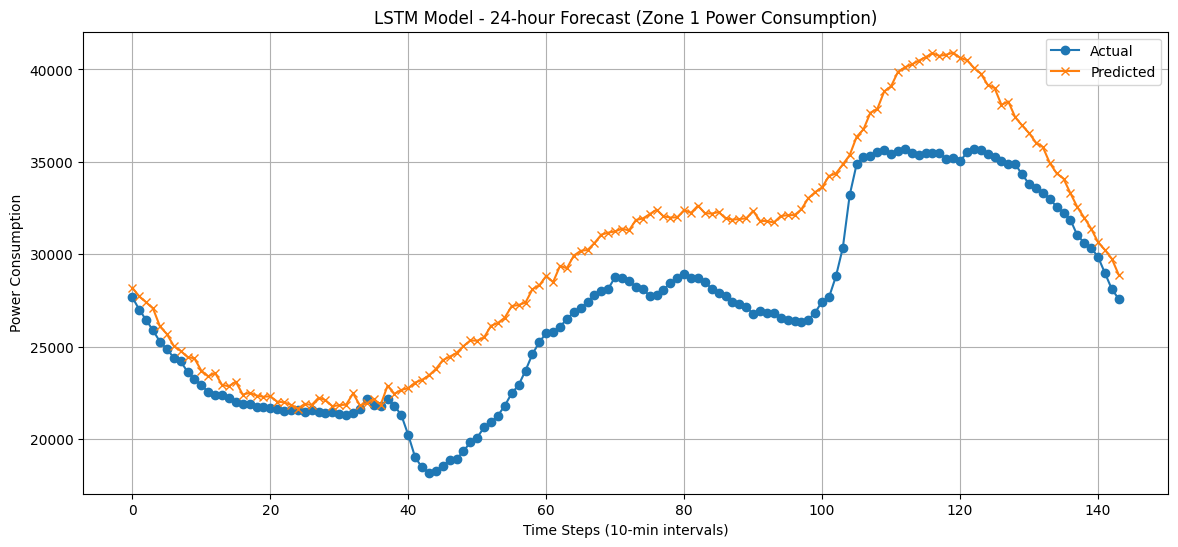

📊 LSTM Model Evaluation Metrics:
MAE (Mean Absolute Error): 1304.13
RMSE (Root Mean Squared Error): 1731.75
R² Score: 0.9216


In [ ]:
# ---------------------------
# Install TensorFlow if not already installed
# !pip install tensorflow
# ---------------------------

import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, InputLayer
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# ---------------------------
# Step 1: Normalize and prepare data
# ---------------------------
zone1_series = df['Zone_1_Power_Consumption'].values.reshape(-1, 1)

scaler = MinMaxScaler()
zone1_scaled = scaler.fit_transform(zone1_series)

input_steps = 144  # 24 hours back
output_steps = 144  # 24 hours ahead

X, y = [], []
for i in range(input_steps, len(zone1_scaled) - output_steps):
    X.append(zone1_scaled[i - input_steps:i])
    y.append(zone1_scaled[i:i + output_steps])

X, y = np.array(X), np.array(y)

# Split based on DateTime
split_index = np.where(df.index >= pd.to_datetime("2017-12-01"))[0][0] - input_steps
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# ---------------------------
# Step 2: Build the LSTM model
# ---------------------------
lstm_model = Sequential([
    InputLayer(input_shape=(input_steps, 1)),
    LSTM(64, activation='tanh'),
    Dense(output_steps)
])

lstm_model.compile(optimizer='adam', loss='mse')

lstm_model.summary()

# ---------------------------
# Step 3: Train the model
# ---------------------------
history = lstm_model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=10,
    batch_size=128,
    verbose=1
)

# ---------------------------
# Step 4: Evaluate model
# ---------------------------
# Predict on test set
y_pred = lstm_model.predict(X_test)

# Inverse scale the predictions for easier interpretation
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, output_steps))
y_pred_inv = scaler.inverse_transform(y_pred)

# ---------------------------
# Plot for a single test sample
# ---------------------------
plt.figure(figsize=(14,6))
plt.plot(y_test_inv[0], label="Actual", marker='o')
plt.plot(y_pred_inv[0], label="Predicted", marker='x')
plt.title("LSTM Model - 24-hour Forecast (Zone 1 Power Consumption)")
plt.xlabel("Time Steps (10-min intervals)")
plt.ylabel("Power Consumption")
plt.legend()
plt.grid(True)
plt.show()

# ---------------------------
# Step 5: Calculate and print evaluation metrics
# ---------------------------
# Flatten arrays for overall metric calculation
y_test_flat = y_test_inv.flatten()
y_pred_flat = y_pred_inv.flatten()

mae_lstm = mean_absolute_error(y_test_flat, y_pred_flat)
rmse_lstm = np.sqrt(mean_squared_error(y_test_flat, y_pred_flat))
r2_lstm = r2_score(y_test_flat, y_pred_flat)

print(f"📊 LSTM Model Evaluation Metrics:")
print(f"MAE (Mean Absolute Error): {mae_lstm:.2f}")
print(f"RMSE (Root Mean Squared Error): {rmse_lstm:.2f}")
print(f"R² Score: {r2_lstm:.4f}")


# **PROPHET**

DEBUG:cmdstanpy:input tempfile: /tmp/tmp2rpxt2b5/xxv3yn_i.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2rpxt2b5/5fff64ij.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=22082', 'data', 'file=/tmp/tmp2rpxt2b5/xxv3yn_i.json', 'init=/tmp/tmp2rpxt2b5/5fff64ij.json', 'output', 'file=/tmp/tmp2rpxt2b5/prophet_model95q2_kod/prophet_model-20250427140220.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:02:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:02:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


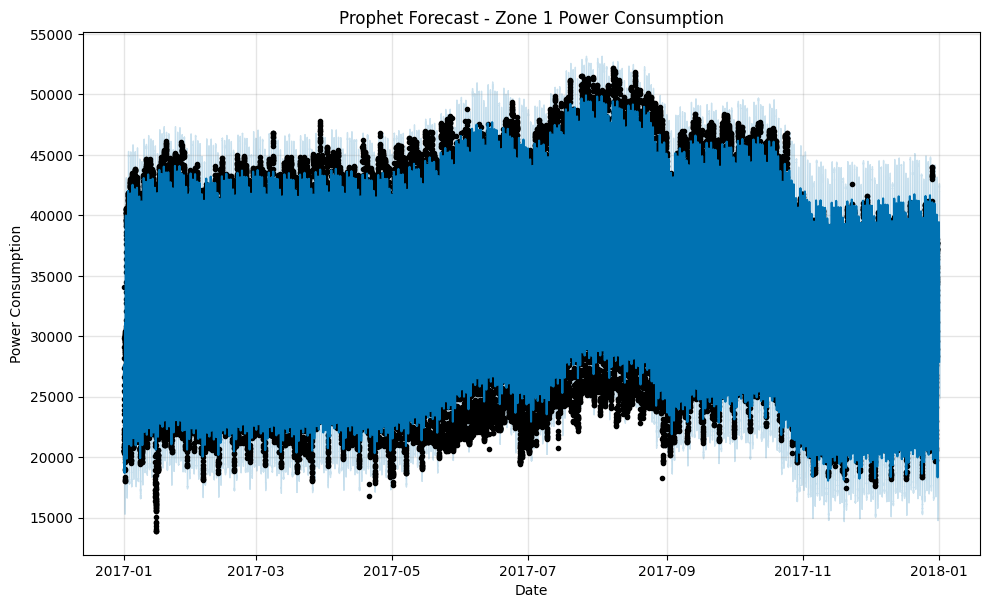

📊 Prophet Model Evaluation Metrics:
MAE (Mean Absolute Error): 1798.25
RMSE (Root Mean Squared Error): 2480.63
R² Score: 0.8790


In [ ]:
# ---------------------------
# Install Prophet if not installed
# !pip install prophet
# ---------------------------

import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# ---------------------------
# Step 1: Prepare data for Prophet
# ---------------------------
df = pd.read_csv('/content/Tetuan City power consumption.csv')  # adjust path if needed
df['DateTime'] = pd.to_datetime(df['DateTime'])
df.set_index('DateTime', inplace=True)

# Prepare dataframe for Prophet
df_prophet = df[['Zone 1 Power Consumption']].reset_index()
df_prophet.columns = ['ds', 'y']

# ---------------------------
# Step 2: Build and fit Prophet model
# ---------------------------
prophet_model = Prophet(
    daily_seasonality=True,
    yearly_seasonality=True,
    weekly_seasonality=True
)

prophet_model.fit(df_prophet)

# ---------------------------
# Step 3: Make future dataframe
# ---------------------------
future = prophet_model.make_future_dataframe(periods=144, freq='10min')  # next 24 hours

# Predict
forecast = prophet_model.predict(future)

# ---------------------------
# Step 4: Plot results
# ---------------------------
fig = prophet_model.plot(forecast)
plt.title("Prophet Forecast - Zone 1 Power Consumption")
plt.xlabel("Date")
plt.ylabel("Power Consumption")
plt.grid(True)
plt.show()

# ---------------------------
# Step 5: Evaluate model performance
# ---------------------------

# Only evaluate on existing data (no future forecast part)
# Align forecasted values with true values
y_true = df_prophet['y'].values
y_pred = forecast['yhat'].iloc[:len(y_true)].values

# Calculate Metrics
mae_prophet = mean_absolute_error(y_true, y_pred)
rmse_prophet = np.sqrt(mean_squared_error(y_true, y_pred))
r2_prophet = r2_score(y_true, y_pred)

# Print Metrics
print(f"📊 Prophet Model Evaluation Metrics:")
print(f"MAE (Mean Absolute Error): {mae_prophet:.2f}")
print(f"RMSE (Root Mean Squared Error): {rmse_prophet:.2f}")
print(f"R² Score: {r2_prophet:.4f}")


# **GRU**

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_3 (GRU)                     │ (None, 64)             │        12,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 144)            │         9,360 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,224 (86.81 KB)

 Trainable params: 22,224 (86.81 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 0.0756 - val_loss: 0.0104
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0102 - val_loss: 0.0054
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0056 - val_loss: 0.0033
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0044 - val_loss: 0.0026
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0039 - val_loss: 0.0023
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.0036 - val_loss: 0.0027
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 0.0035 - val_loss: 0.0022
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0034 - val_loss: 0.0021
Epoch 9/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.0033 - val_loss: 0.0024
Epoch 10/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 0.0032 - val_loss: 0.0024
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


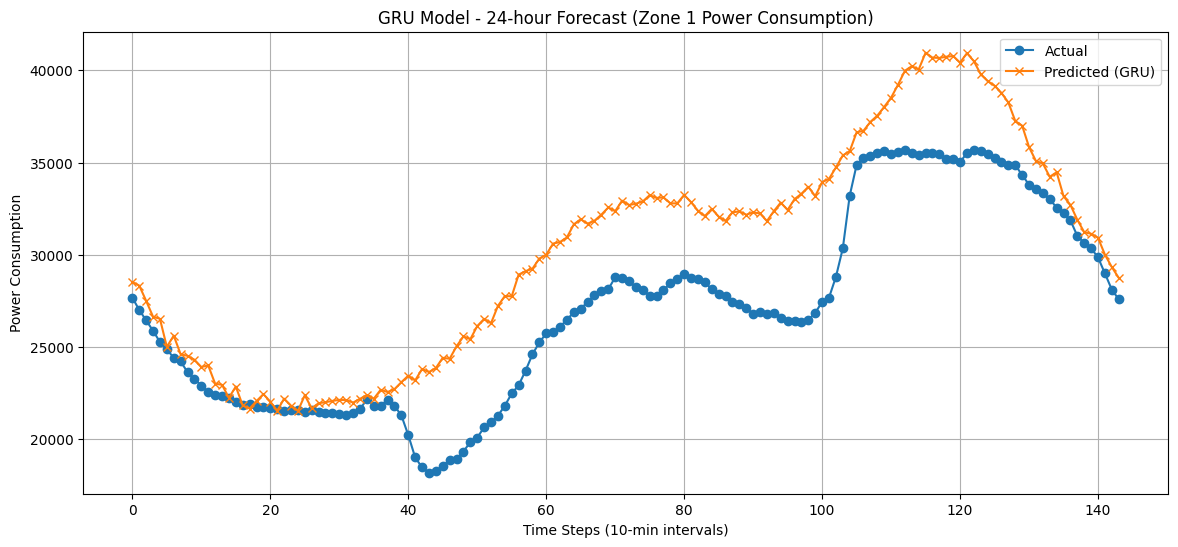

📊 GRU Model Evaluation Metrics:
MAE (Mean Absolute Error): 1414.71
RMSE (Root Mean Squared Error): 1886.03
R² Score: 0.9070


In [ ]:
# ---------------------------
# Install TensorFlow if not installed
# !pip install tensorflow
# ---------------------------

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, InputLayer

# ---------------------------
# Step 1: Load and Prepare data
# ---------------------------
df = pd.read_csv('/content/Tetuan City power consumption.csv')  # adjust if needed
df['DateTime'] = pd.to_datetime(df['DateTime'])
df.set_index('DateTime', inplace=True)
df.columns = [col.strip().replace(' ', '_') for col in df.columns]

zone1_series = df['Zone_1_Power_Consumption'].values.reshape(-1, 1)

scaler = MinMaxScaler()
zone1_scaled = scaler.fit_transform(zone1_series)

input_steps = 144
output_steps = 144

X, y = [], []
for i in range(input_steps, len(zone1_scaled) - output_steps):
    X.append(zone1_scaled[i - input_steps:i])
    y.append(zone1_scaled[i:i + output_steps])

X, y = np.array(X), np.array(y)

split_index = np.where(df.index >= pd.to_datetime("2017-12-01"))[0][0] - input_steps
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# ---------------------------
# Step 2: Build GRU Model
# ---------------------------
gru_model = Sequential([
    InputLayer(input_shape=(input_steps, 1)),
    GRU(64, activation='tanh'),
    Dense(output_steps)
])

gru_model.compile(optimizer='adam', loss='mse')

gru_model.summary()

# ---------------------------
# Step 3: Train GRU
# ---------------------------
history_gru = gru_model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=10,
    batch_size=128,
    verbose=1
)

# ---------------------------
# Step 4: Predict and Plot
# ---------------------------
y_pred_gru = gru_model.predict(X_test)

y_test_inv = scaler.inverse_transform(y_test.reshape(-1, output_steps))
y_pred_inv = scaler.inverse_transform(y_pred_gru)

# Plot 24-hour forecast (first sample)
plt.figure(figsize=(14,6))
plt.plot(y_test_inv[0], label="Actual", marker='o')
plt.plot(y_pred_inv[0], label="Predicted (GRU)", marker='x')
plt.title("GRU Model - 24-hour Forecast (Zone 1 Power Consumption)")
plt.xlabel("Time Steps (10-min intervals)")
plt.ylabel("Power Consumption")
plt.legend()
plt.grid(True)
plt.show()

# ---------------------------
# Step 5: Calculate and print evaluation metrics
# ---------------------------
# Flatten arrays for overall metric calculation
y_test_flat = y_test_inv.flatten()
y_pred_flat = y_pred_inv.flatten()

mae_gru = mean_absolute_error(y_test_flat, y_pred_flat)
rmse_gru = np.sqrt(mean_squared_error(y_test_flat, y_pred_flat))
r2_gru = r2_score(y_test_flat, y_pred_flat)

print(f"📊 GRU Model Evaluation Metrics:")
print(f"MAE (Mean Absolute Error): {mae_gru:.2f}")
print(f"RMSE (Root Mean Squared Error): {rmse_gru:.2f}")
print(f"R² Score: {r2_gru:.4f}")


# **RNN**

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 64)             │         4,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 144)            │         9,360 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,584 (53.06 KB)

 Trainable params: 13,584 (53.06 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - loss: 0.0651 - val_loss: 0.0139
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - loss: 0.0130 - val_loss: 0.0094
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - loss: 0.0078 - val_loss: 0.0041
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 0.0114 - val_loss: 0.0054
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - loss: 0.0062 - val_loss: 0.0051
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 0.0057 - val_loss: 0.0043
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - loss: 0.0067 - val_loss: 0.0088
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 0.0106 - val_loss: 0.0250
Epoch 9/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 0.0220 - val_loss: 0.0164
Epoch 10/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - loss: 0.0178 - val_loss: 0.0117
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


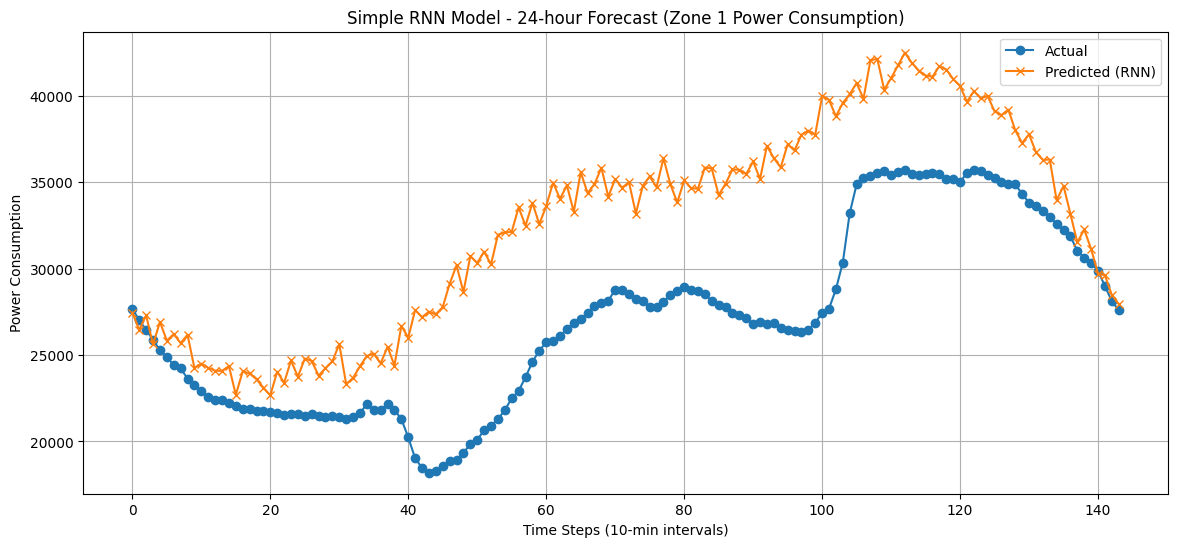

📊 RNN Model Evaluation Metrics:
MAE (Mean Absolute Error): 3150.36
RMSE (Root Mean Squared Error): 4144.63
R² Score: 0.5511


In [ ]:
# ---------------------------
# Install TensorFlow if not installed
# !pip install tensorflow
# ---------------------------

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, InputLayer

# ---------------------------
# Step 1: Load and Prepare data
# ---------------------------
df = pd.read_csv('/content/Tetuan City power consumption.csv')  # adjust path if needed
df['DateTime'] = pd.to_datetime(df['DateTime'])
df.set_index('DateTime', inplace=True)
df.columns = [col.strip().replace(' ', '_') for col in df.columns]

zone1_series = df['Zone_1_Power_Consumption'].values.reshape(-1, 1)

scaler = MinMaxScaler()
zone1_scaled = scaler.fit_transform(zone1_series)

input_steps = 144  # past 24 hours
output_steps = 144  # next 24 hours

X, y = [], []
for i in range(input_steps, len(zone1_scaled) - output_steps):
    X.append(zone1_scaled[i - input_steps:i])
    y.append(zone1_scaled[i:i + output_steps])

X, y = np.array(X), np.array(y)

split_index = np.where(df.index >= pd.to_datetime("2017-12-01"))[0][0] - input_steps
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# ---------------------------
# Step 2: Build the RNN model
# ---------------------------
rnn_model = Sequential([
    InputLayer(input_shape=(input_steps, 1)),
    SimpleRNN(64, activation='tanh'),
    Dense(output_steps)
])

rnn_model.compile(optimizer='adam', loss='mse')

rnn_model.summary()

# ---------------------------
# Step 3: Train the RNN
# ---------------------------
history_rnn = rnn_model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=10,
    batch_size=128,
    verbose=1
)

# ---------------------------
# Step 4: Predict and Plot
# ---------------------------
y_pred_rnn = rnn_model.predict(X_test)

y_test_inv = scaler.inverse_transform(y_test.reshape(-1, output_steps))
y_pred_inv = scaler.inverse_transform(y_pred_rnn)

# Plot first test sample
plt.figure(figsize=(14,6))
plt.plot(y_test_inv[0], label="Actual", marker='o')
plt.plot(y_pred_inv[0], label="Predicted (RNN)", marker='x')
plt.title("Simple RNN Model - 24-hour Forecast (Zone 1 Power Consumption)")
plt.xlabel("Time Steps (10-min intervals)")
plt.ylabel("Power Consumption")
plt.legend()
plt.grid(True)
plt.show()

# ---------------------------
# Step 5: Evaluate RNN Performance
# ---------------------------
y_test_flat = y_test_inv.flatten()
y_pred_flat = y_pred_inv.flatten()

mae_rnn = mean_absolute_error(y_test_flat, y_pred_flat)
rmse_rnn = np.sqrt(mean_squared_error(y_test_flat, y_pred_flat))
r2_rnn = r2_score(y_test_flat, y_pred_flat)

print(f"📊 RNN Model Evaluation Metrics:")
print(f"MAE (Mean Absolute Error): {mae_rnn:.2f}")
print(f"RMSE (Root Mean Squared Error): {rmse_rnn:.2f}")
print(f"R² Score: {r2_rnn:.4f}")


# **Comparison**

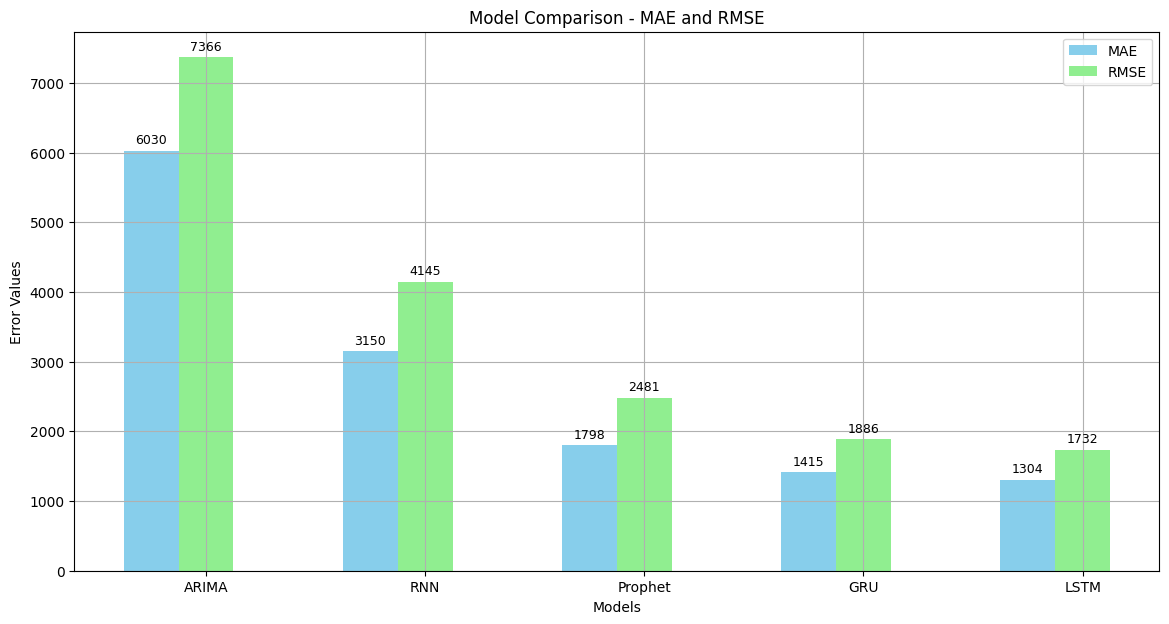

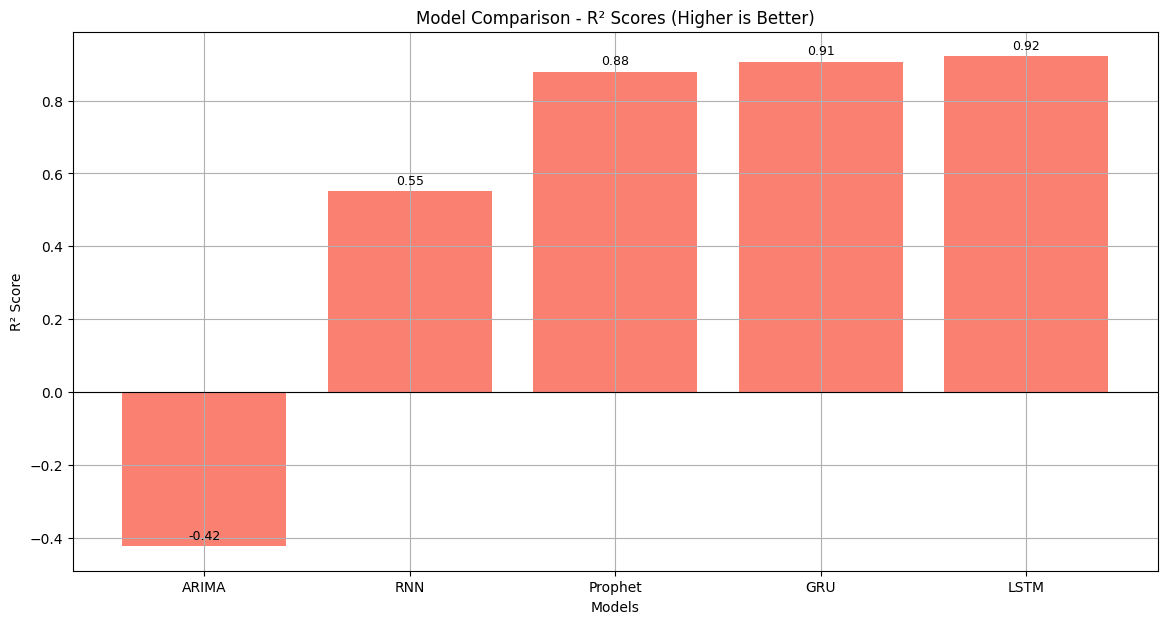

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# ---------------------------
# Define your model results
# ---------------------------
models = ['ARIMA', 'RNN', 'Prophet', 'GRU', 'LSTM']

mae_scores = [6029.54, 3150.36, 1798.25, 1414.71, 1304.13]
rmse_scores = [7366.27, 4144.63, 2480.63, 1886.03, 1731.75]
r2_scores = [-0.4227, 0.5511, 0.8790, 0.9070, 0.9216]

x = np.arange(len(models))  # model locations
width = 0.25  # bar width

# ---------------------------
# Plot MAE and RMSE
# ---------------------------
fig, ax = plt.subplots(figsize=(14,7))

bars1 = ax.bar(x - width, mae_scores, width, label='MAE', color='skyblue')
bars2 = ax.bar(x, rmse_scores, width, label='RMSE', color='lightgreen')

# Add labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Models')
ax.set_ylabel('Error Values')
ax.set_title('Model Comparison - MAE and RMSE')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()
ax.grid(True)

# Label bars with their height
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.0f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=9)

add_labels(bars1)
add_labels(bars2)

plt.show()

# ---------------------------
# Plot R² Scores separately
# ---------------------------
fig, ax = plt.subplots(figsize=(14,7))

bars3 = ax.bar(models, r2_scores, color='salmon')

ax.set_xlabel('Models')
ax.set_ylabel('R² Score')
ax.set_title('Model Comparison - R² Scores (Higher is Better)')
ax.axhline(0, color='black', linewidth=0.8)
ax.grid(True)

# Label bars with their height
for bar in bars3:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom', fontsize=9)

plt.show()


# Generating Dataset to **Test**

In [ ]:
import pandas as pd
import numpy as np

# ---------------------------
# Create a bigger synthetic dataset
# ---------------------------

# Generate DateTime range (every 10 minutes)
date_range_big = pd.date_range(start='2025-01-01 00:00:00', periods=1440, freq='10min')  # 1440 entries = 10 days

# Random realistic values
np.random.seed(42)

temperature_big = np.random.uniform(5, 35, size=len(date_range_big))
humidity_big = np.random.uniform(30, 90, size=len(date_range_big))
wind_speed_big = np.random.uniform(0, 5, size=len(date_range_big))
general_diffuse_flows_big = np.random.uniform(0, 500, size=len(date_range_big))
diffuse_flows_big = np.random.uniform(0, 300, size=len(date_range_big))

# Create power consumption with a fake *daily pattern* (higher during day, lower at night)
hours = date_range_big.hour + date_range_big.minute / 60.0
zone1_power_big = 25000 + 10000 * np.sin((hours / 24.0) * 2 * np.pi) + np.random.normal(0, 2000, size=len(date_range_big))
zone2_power_big = 15000 + 7000 * np.sin((hours / 24.0) * 2 * np.pi) + np.random.normal(0, 1500, size=len(date_range_big))
zone3_power_big = 18000 + 6000 * np.sin((hours / 24.0) * 2 * np.pi) + np.random.normal(0, 1500, size=len(date_range_big))

# Build the DataFrame
big_df = pd.DataFrame({
    'DateTime': date_range_big,
    'Temperature': temperature_big,
    'Humidity': humidity_big,
    'Wind_Speed': wind_speed_big,
    'general_diffuse_flows': general_diffuse_flows_big,
    'diffuse_flows': diffuse_flows_big,
    'Zone_1_Power_Consumption': zone1_power_big,
    'Zone_2_Power_Consumption': zone2_power_big,
    'Zone_3_Power_Consumption': zone3_power_big,
})

big_df.set_index('DateTime', inplace=True)

# Display
print(big_df.head())


                     Temperature   Humidity  Wind_Speed  \
DateTime                                                  
2025-01-01 00:00:00    16.236204  88.194723    1.657823   
2025-01-01 00:10:00    33.521429  35.634043    4.275151   
2025-01-01 00:20:00    26.959818  70.356127    1.035379   
2025-01-01 00:30:00    22.959755  56.625013    0.355791   
2025-01-01 00:40:00     9.680559  82.088535    0.345038   

                     general_diffuse_flows  diffuse_flows  \
DateTime                                                    
2025-01-01 00:00:00             290.322613     228.638886   
2025-01-01 00:10:00             467.968624     280.852969   
2025-01-01 00:20:00             336.125344     282.225258   
2025-01-01 00:30:00             240.638976      52.434385   
2025-01-01 00:40:00             404.837518     262.423095   

                     Zone_1_Power_Consumption  Zone_2_Power_Consumption  \
DateTime                                                                  
2025-01-

DEBUG:cmdstanpy:input tempfile: /tmp/tmp2rpxt2b5/l9dmr_kz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2rpxt2b5/yxh50tcf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=15696', 'data', 'file=/tmp/tmp2rpxt2b5/l9dmr_kz.json', 'init=/tmp/tmp2rpxt2b5/yxh50tcf.json', 'output', 'file=/tmp/tmp2rpxt2b5/prophet_modelgwq22e__/prophet_model-20250427133745.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:37:45 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:37:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


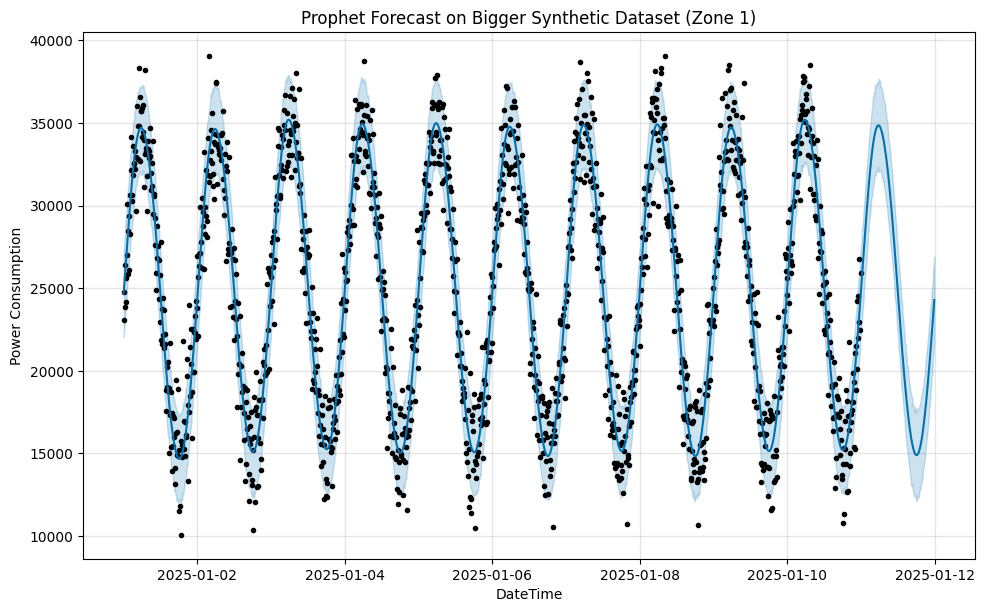

In [ ]:
# Install Prophet if needed
# !pip install prophet

from prophet import Prophet
import matplotlib.pyplot as plt

# ---------------------------
# Prepare Data for Prophet
# ---------------------------
prophet_big_df = big_df[['Zone_1_Power_Consumption']].reset_index()
prophet_big_df.columns = ['ds', 'y']

# ---------------------------
# Build Prophet Model
# ---------------------------
prophet_model_big = Prophet(
    daily_seasonality=True,
    weekly_seasonality=True,
    yearly_seasonality=False  # 10 days data, no yearly needed
)

prophet_model_big.fit(prophet_big_df)

# ---------------------------
# Create Future DataFrame (for next 24 hours)
# ---------------------------
future_big = prophet_model_big.make_future_dataframe(periods=144, freq='10min')

# Predict
forecast_big = prophet_model_big.predict(future_big)

# ---------------------------
# Plot Results
# ---------------------------
fig = prophet_model_big.plot(forecast_big)
plt.title("Prophet Forecast on Bigger Synthetic Dataset (Zone 1)")
plt.xlabel("DateTime")
plt.ylabel("Power Consumption")
plt.grid(True)
plt.show()


# **For Zone 2 and 3**

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


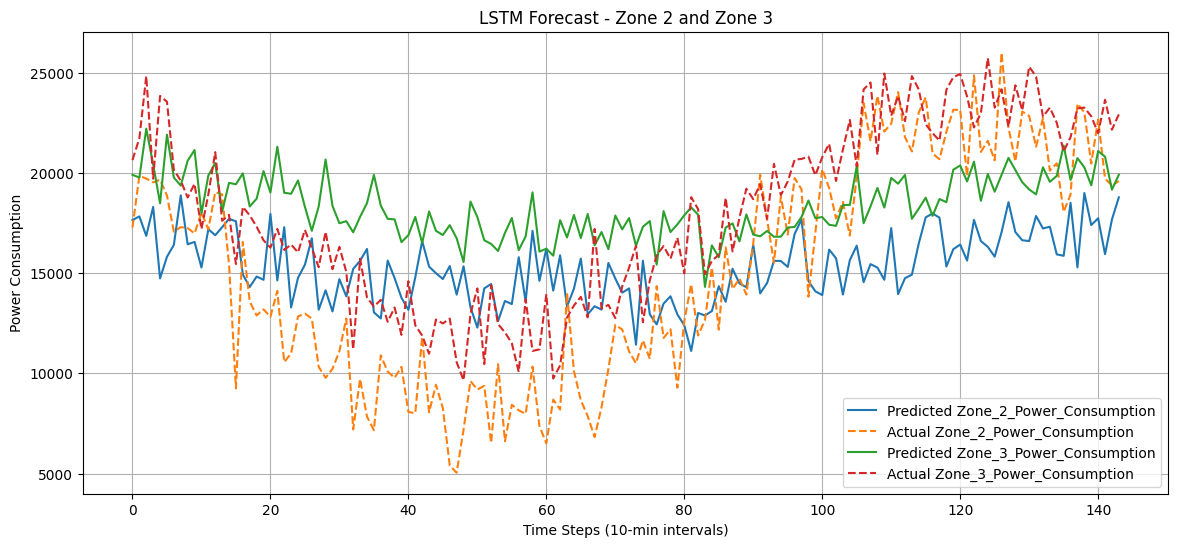

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


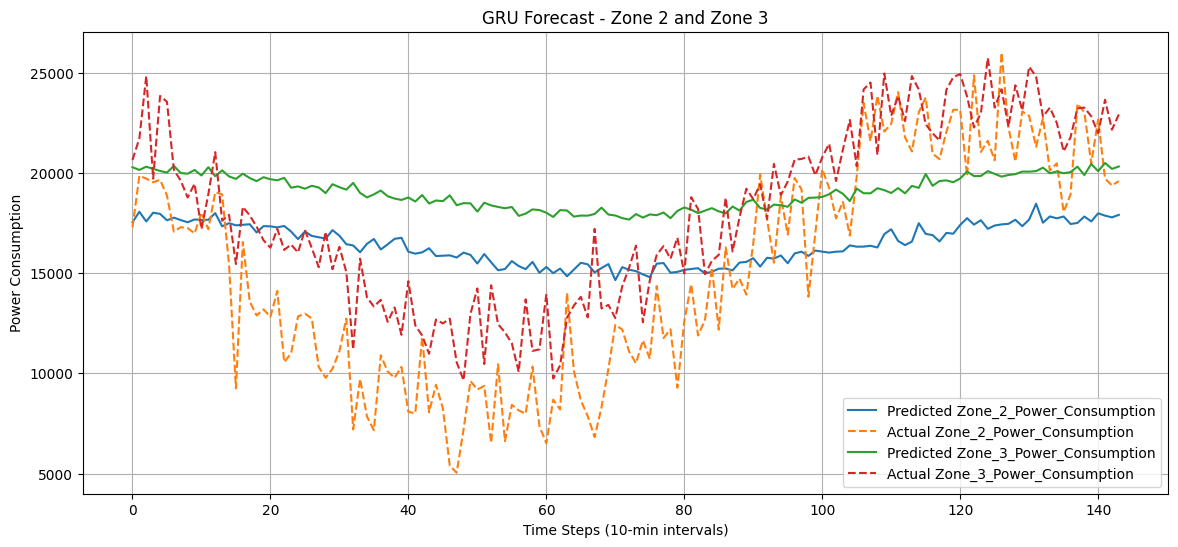

DEBUG:cmdstanpy:input tempfile: /tmp/tmp2rpxt2b5/ydr74g6a.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2rpxt2b5/zc3xjx56.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=26322', 'data', 'file=/tmp/tmp2rpxt2b5/ydr74g6a.json', 'init=/tmp/tmp2rpxt2b5/zc3xjx56.json', 'output', 'file=/tmp/tmp2rpxt2b5/prophet_modelnler43hq/prophet_model-20250427134334.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:43:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:43:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2rpxt2b5/3ka85hjw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2rpxt2b5/p4547o5x.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

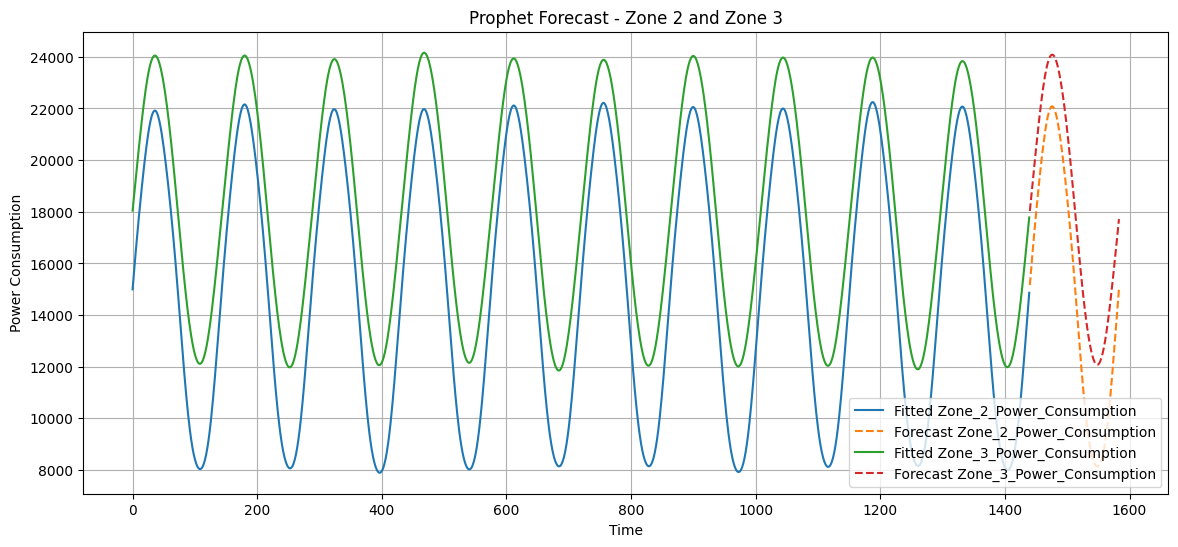

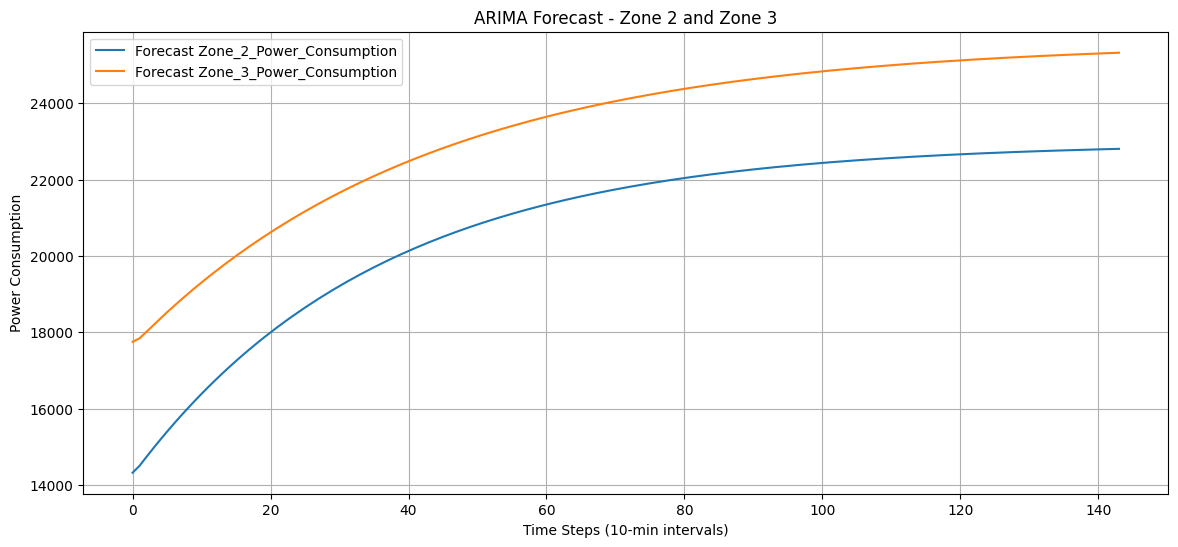

In [ ]:
# ---------------------------
# Import Libraries
# ---------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense, InputLayer
from prophet import Prophet
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# ---------------------------
# Load Dataset (your big_df)
# ---------------------------
# Assuming you have already created "big_df"

# ---------------------------
# Define common variables
# ---------------------------
input_steps = 144  # 24 hours back
output_steps = 144  # predict next 24 hours

# Zones
zones = ['Zone_2_Power_Consumption', 'Zone_3_Power_Consumption']

# ---------------------------
# LSTM for Zone 2 and Zone 3
# ---------------------------
lstm_preds = {}
actuals = {}

for zone in zones:
    # Scaling
    scaler = MinMaxScaler()
    scaled = scaler.fit_transform(big_df[[zone]])

    # Create sequences
    X, y = [], []
    for i in range(input_steps, len(scaled) - output_steps):
        X.append(scaled[i - input_steps:i])
        y.append(scaled[i:i + output_steps].flatten())
    X, y = np.array(X), np.array(y)

    # Train-test split
    split_idx = int(0.8 * len(X))
    X_train, X_test = X[:split_idx], X[split_idx:]
    y_train, y_test = y[:split_idx], y[split_idx:]

    # Build LSTM model
    model = Sequential([
        InputLayer(input_shape=(input_steps, 1)),
        LSTM(64, activation='tanh'),
        Dense(output_steps)
    ])
    model.compile(optimizer='adam', loss='mse')
    model.fit(X_train, y_train, epochs=10, batch_size=128, verbose=0)

    # Predict
    y_pred = model.predict(X_test)
    lstm_preds[zone] = scaler.inverse_transform(y_pred).flatten()
    actuals[zone] = scaler.inverse_transform(y_test).flatten()

# Plot LSTM
plt.figure(figsize=(14,6))
for zone in zones:
    plt.plot(lstm_preds[zone][:144], label=f"Predicted {zone}")
    plt.plot(actuals[zone][:144], label=f"Actual {zone}", linestyle='--')
plt.title("LSTM Forecast - Zone 2 and Zone 3")
plt.xlabel("Time Steps (10-min intervals)")
plt.ylabel("Power Consumption")
plt.legend()
plt.grid(True)
plt.show()

# ---------------------------
# GRU for Zone 2 and Zone 3
# ---------------------------
gru_preds = {}

for zone in zones:
    # Scaling
    scaler = MinMaxScaler()
    scaled = scaler.fit_transform(big_df[[zone]])

    # Create sequences
    X, y = [], []
    for i in range(input_steps, len(scaled) - output_steps):
        X.append(scaled[i - input_steps:i])
        y.append(scaled[i:i + output_steps].flatten())
    X, y = np.array(X), np.array(y)

    # Train-test split
    split_idx = int(0.8 * len(X))
    X_train, X_test = X[:split_idx], X[split_idx:]
    y_train, y_test = y[:split_idx], y[split_idx:]

    # Build GRU model
    model = Sequential([
        InputLayer(input_shape=(input_steps, 1)),
        GRU(64, activation='tanh'),
        Dense(output_steps)
    ])
    model.compile(optimizer='adam', loss='mse')
    model.fit(X_train, y_train, epochs=10, batch_size=128, verbose=0)

    # Predict
    y_pred = model.predict(X_test)
    gru_preds[zone] = scaler.inverse_transform(y_pred).flatten()

# Plot GRU
plt.figure(figsize=(14,6))
for zone in zones:
    plt.plot(gru_preds[zone][:144], label=f"Predicted {zone}")
    plt.plot(actuals[zone][:144], label=f"Actual {zone}", linestyle='--')
plt.title("GRU Forecast - Zone 2 and Zone 3")
plt.xlabel("Time Steps (10-min intervals)")
plt.ylabel("Power Consumption")
plt.legend()
plt.grid(True)
plt.show()

# ---------------------------
# Prophet for Zone 2 and Zone 3
# ---------------------------
prophet_preds = {}

for zone in zones:
    # Prepare data
    prophet_df = big_df[[zone]].reset_index()
    prophet_df.columns = ['ds', 'y']

    model = Prophet(daily_seasonality=True, weekly_seasonality=True, yearly_seasonality=False)
    model.fit(prophet_df)

    future = model.make_future_dataframe(periods=144, freq='10min')
    forecast = model.predict(future)

    prophet_preds[zone] = forecast['yhat'].values.flatten()

# Plot Prophet
plt.figure(figsize=(14,6))
for zone in zones:
    plt.plot(prophet_preds[zone][:len(big_df)], label=f"Fitted {zone}")
    plt.plot(np.arange(len(big_df), len(big_df)+144), prophet_preds[zone][len(big_df):], label=f"Forecast {zone}", linestyle='--')
plt.title("Prophet Forecast - Zone 2 and Zone 3")
plt.xlabel("Time")
plt.ylabel("Power Consumption")
plt.legend()
plt.grid(True)
plt.show()

# ---------------------------
# ARIMA for Zone 2 and Zone 3
# ---------------------------
arima_preds = {}

for zone in zones:
    train_size = int(0.8 * len(big_df))
    train, test = big_df[zone].values[:train_size], big_df[zone].values[train_size:]

    model = ARIMA(train, order=(2,1,2))
    model_fit = model.fit()

    forecast = model_fit.forecast(steps=len(test))
    arima_preds[zone] = forecast

# Plot ARIMA
plt.figure(figsize=(14,6))
for zone in zones:
    plt.plot(arima_preds[zone][:144], label=f"Forecast {zone}")
plt.title("ARIMA Forecast - Zone 2 and Zone 3")
plt.xlabel("Time Steps (10-min intervals)")
plt.ylabel("Power Consumption")
plt.legend()
plt.grid(True)
plt.show()


# **Feature Engineering Starts Here**



In [ ]:
# ---------------------------
# Import necessary libraries
# ---------------------------
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# ---------------------------
# Use the big_df dataset
# ---------------------------
# Assuming 'big_df' is already created

# Features to use
features = ['Temperature', 'Humidity', 'Wind_Speed', 'general_diffuse_flows', 'diffuse_flows']

# Target Zones
target_zones = ['Zone_1_Power_Consumption', 'Zone_2_Power_Consumption', 'Zone_3_Power_Consumption']

# ---------------------------
# Step 1: Train RandomForest models for each zone
# ---------------------------
zone_models = {}

for zone in target_zones:
    X = big_df[features]
    y = big_df[zone]

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train RandomForest
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    zone_models[zone] = model

print("✅ Models trained for Zone 1, Zone 2, and Zone 3!")

# ---------------------------
# Step 2: Take user input
# ---------------------------
print("\nEnter the following values (or press Enter to use default values):")

try:
    temp = float(input("Temperature (default 25.0): ") or 25.0)
    humidity = float(input("Humidity (default 60.0): ") or 60.0)
    wind_speed = float(input("Wind Speed (default 1.5): ") or 1.5)
    general_diffuse = float(input("General Diffuse Flows (default 300): ") or 300)
    diffuse = float(input("Diffuse Flows (default 150): ") or 150)
except Exception as e:
    print(f"Invalid input, using all default values. Error: {e}")
    temp, humidity, wind_speed, general_diffuse, diffuse = 25.0, 60.0, 1.5, 300, 150

# Prepare input
user_input = np.array([[temp, humidity, wind_speed, general_diffuse, diffuse]])

# ---------------------------
# Step 3: Predict for all zones
# ---------------------------
print("\n🔮 Predicted Power Consumption:")

for zone in target_zones:
    prediction = zone_models[zone].predict(user_input)[0]
    print(f"{zone.replace('_', ' ')}: {prediction:.2f} units")



✅ Models trained for Zone 1, Zone 2, and Zone 3!

Enter the following values (or press Enter to use default values):
Temperature (default 25.0): 30
Humidity (default 60.0): 70
Wind Speed (default 1.5): 2
General Diffuse Flows (default 300): 325
Diffuse Flows (default 150): 200

🔮 Predicted Power Consumption:
Zone 1 Power Consumption: 25080.86 units
Zone 2 Power Consumption: 15059.43 units
Zone 3 Power Consumption: 17728.56 units


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
